# TensorFlow Tutorial
Ce notebook s'inspire grandement de celui utilisé dans la spécialisation Deep Learning de Andrew NG, disponible sur Coursera : https://www.coursera.org/specializations/deep-learning?adgroupid=58953588605&adpostion=1t1&authMode=login&campaignid=1599063752&creativeid=303554599611&device=c&devicemodel=&gclid=EAIaIQobChMI0b6mjKf03gIV5DLTCh2ySAgmEAAYASAAEgJvBfD_BwE&hide_mobile_promo=&keyword=coursera%2Bonline%2Bcourses&matchtype=b&network=g&utm_medium=sem&utm_source=gg&errorCode=invalidCredential.


Dans cet exercice vous allez apprendre à utiliser la librairie Tensorflow. 

C'est la librairie la plus largement utilisée mais d'autres librairies peuvent être plus performantes/adaptées selon les cas. 

Elle permet de définir précisément l'architecture de votre réseau de neurones sans avoir à tout "re-développer". Concrètement vous allez :

- initialiser les variables
- démarrer une session tensorflow
- Entraîner votre modèle
- Implémenter votre modèle



## 1 - Exploration de la librairie Tensorflow


Avant d'importer les librairies vérifiez que la librairire h5py est bien installée sur votre environnement, sinon depuis votre "anaconda prompt" executez :

pip install h5py

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches_v2, convert_to_one_hot_v2

%matplotlib inline
np.random.seed(1)

D:\Programmes\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


La prochaine cellule vous montrera comment créer des constantes, variables et démarrer votre session :

In [2]:
moyenne = tf.constant(36, name='moyenne') 
minimum = tf.constant(6, name='minimum') 
maximum = tf.constant(80, name='maximum') 
x = tf.constant(39, name='x')                    
standardisation = tf.Variable((x-moyenne)/(maximum-minimum), name='standardisation')  

print(standardisation)

<tf.Variable 'standardisation:0' shape=() dtype=float64_ref>


In [3]:
init = tf.global_variables_initializer()    

In [4]:
with tf.Session() as session:                    
    session.run(init)                            
    print(session.run(standardisation))                     

0.04054054054054054


Lors de chaque utilisation de Tensorflow vous devrez :

1. Déclarer des Tensors (variables) qui ne sont pas exécutées . 
2. Ecrire des opérations entre les Tensors
3. Initialiser vos Tensors. 
4. Créer une "Session". 
5. Executer votre session et ainsi évaluer toutes vos opérations. 

A noter que lorsque nous déclarons la variable "standardisation", celle-ci ne sera calculée qu'après avoir exécuté `session.run(standardisation)`.


**A retenir : d'abord initialisez vos variables, puis créez une session et exécutez au sein de votre session**. 

Maintenant nous allons définir ce qu'est un placeholder. 

Un placeholder est un autre type de varariables dans Tensorflow. Vous ne pouvez lui assigner une valeur que plus tard. Vous pouvez utiliser "feed dictionary" pour ce faire :

In [5]:
# Exemple :

x = tf.placeholder(tf.int64, name = 'x')
with tf.Session() as session:                    
    session.run(init)   
    print(session.run(2 * x, feed_dict = {x: 3}))

6


Quand vous définissez votre placeholder vous n'avez pas besoin de lui affecter une valeur.

Tensorflow fonctionne avec un graphe d'opérations.
Le placeholder n'est ni plus ni moins qu'une variable où l'affectation ne se fait pas au moment de sa décalaration. 

Vous verrez au cours de ce TP quand les utiliser. 

### 1.1 - Fonction Linéaire

Nous allons commencer par développer une fonction permettant de calculer une fonction linéaire : $Y = WX + b$, où $W$ et $X$ sont des matrices aléatoires et b est un vecteur aléatoire. 

Initialiser l'ensemble des variables décrites plus haut.
X sera de "shape(3,1)",
Y sera de "shape(4,3)",
b sera de "shape(4,1)"

Pour cela vous pouvez utiliser les fonctions suivantes :
np.random.randn(),
tf.matmul(M1,M2),
tf.add(V1,V2)

In [6]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### Début de votre exercice
    X =
    W =
    b =
    Y =
    ### Fin de votre exercice ### 
    
    
    sess = tf.Session()
    result = sess.run(Y)
    
    # close the session 
    sess.close()

    return result

In [7]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


*** Résultat attendu ***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

### 1.2 - Calcul de la sigmoid
Tensorflow permet d'utiliser directement des fonctions d'activations comme `tf.sigmoid` ou `tf.softmax`. 



** Exercice **: Implementez la fonction sigmoid. Vous pouvez vous aider des fonctions suivantes : 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Utilisez au choix une des deux méthodes pour créer et utiliser votre session : 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```


In [8]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### Début de votre code ### ( approx. 4 lines of code)
    # Création d'un placeholder x, de type float32.
    x =

    # Calcul de la sigmoid(x)
    sigmoid =

    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess: 
        # Run session and call the output "result"
        result =
    ### Fin de votre code ###
    
    return result

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


*** Résultat attendu ***: 

<table> 
<tr> 
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoid(12)**
</td>
<td>
0.999994
</td>
</tr> 

</table> 

### 1.3 -  Calcul de la fonction de coût

Tensorflow vous permet de développer plus rapidement votre réseau de neurones. Vous pouvez utiliser des fonctions de coûts déjà implémentées plutôt que d'avoir à les redévelopper :
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$


**Exercise**: Implementer la "cross entropy loss". Vous pouvez vous aider des fonctions suivantes: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`


$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [10]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### Début de votre code ### 
    
    # Créez deux placeholders :
    z =
    y =
    
    # Utilisez la fonction de loss
    loss =
    

    sess = tf.Session()
    
    # Démarrez la session.
    cost =
    
    ### Fin de votre code ###
   
    sess.close()

    
    return cost

In [11]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.4138543  0.39956614]


** Résultat attendu** : 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - One Hot Encoding

Comme vu en cours, nous avons bien souvent besoin d'effectuer du "one hot encoding". La encore, Tensorflow nous aide grandement avec la fonction :

- tf.one_hot(labels, depth, axis) 

**Exercise:** Implementez la function ci-dessous pour prendre un vecteur de $C$ classes et retournez un one hot encoding

In [12]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
   

    C = tf.constant(C, name='C')
    
    ### Début de votre code ###
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix =
    ### Fin de votre code ###
    
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot

In [13]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


**Résultat attendu**: 

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


# 2 - Construisez votre premier réseau de neurones

Dans cette partie vous allez découvrir comment constuire un modele avec Tensorflow.
Pour cela vous devrez :

- Créer un grap de caclul
- Executez votre graph dans une session



### 2.0 - Enoncé: SIGNS Dataset

Dans cet exercice vous allez apprendre à reconnaître à partir de l'image d'une main, le nombre de doigts levés. 
Pour ce faire vous disposez de :

- **Training set**: 1080 images (64x64 pixels) montrant de 0 jusqu'à 5 doigts levés avec au moins 180 exemples de chaque.
- **Test set**: 120 images (64x64 pixels) avec au moins 20 exemples de chaque.



In [3]:
# Chargement du dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Vous pouvez changer l'index afin d'obtenir une photo différente :

y = 5


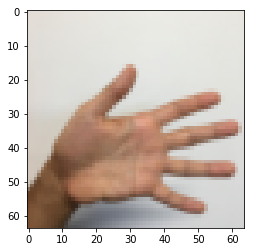

In [4]:
# Exemple d'une image
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

La manière la plus simple de travailler avec des images est de "flatten" votre image, puis de normaliser les valeurs en les divisant par 255. De plus il faut convertir chaque label en one hot encoding :

In [5]:
# Flatten des deux jeux de données
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)

# Normalisation des vecteurs
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.


# Convertion des labels en one hot encoding
Y_train_reshaped = Y_train_orig.T
Y_test_reshaped = Y_test_orig.T
Y_train = convert_to_one_hot_v2(Y_train_reshaped, 6)
Y_test = convert_to_one_hot_v2(Y_test_reshaped, 6)

print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 12288
number of test examples = 12288
X_train shape: (1080, 12288)
Y_train shape: (1080, 6)
X_test shape: (120, 12288)
Y_test shape: (120, 6)


y (OHE) = [0. 0. 0. 0. 0. 1.]
y = 5


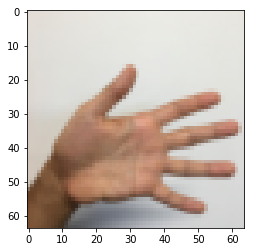

In [6]:
index = 0
plt.imshow(X_train_orig[index])
print ("y (OHE) = " + str(Y_train[index, :]))
print ("y = " + str(np.argmax(Y_train[index, :])))

**Votre but** est de construire un modèle capable de reconnaître à partir d'une image le nombre de doigts levés.

**Le modèle** se construit de la manière suivante :

*LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. 

### 2.1 - Création des placeholders


In [17]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [None, n_x] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    X = tf.placeholder(tf.float32, [None, n_x], name="X")
    Y = tf.placeholder(tf.float32, [None, n_y], name="Y")
    
    return X, Y

**Résultat attendu**: 

<table> 
    <tr> 
        <td>
            **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32) (not necessarily Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(6, ?), dtype=float32) (not necessarily Placeholder_2)
        </td>
    </tr>

</table>

### 2.2 - Initialisation des paramètres


**Exercice:** Vous allez devoir implémenter la fonction ci-dessous. Vous utiliserez la "Xavier Initialization" pour les poids et 0 pour les biais . Les tailles des matrices sont définies ci-dessous :
```python
W1 = tf.get_variable("W1", [12288,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25], initializer = tf.zeros_initializer())
```


In [18]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [12288, 25]
                        b1 : [25]
                        W2 : [25, 12]
                        b2 : [12]
                        W3 : [12, 6]
                        b3 : [6]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
         
    ### Début de votre code ### (approx. 6 lines of code)
    W1 =
    b1 =
    W2 =
    b2 =
    W3 =
    b3 =
    ### Fin de votre code ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [19]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(12288, 25) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25,) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(25, 12) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12,) dtype=float32_ref>


### 2.3 - Forward propagation dans tensorflow 

Vous allez devoir maintenant implémenter la fonction de forwarding. Vous pouvez vous aider des fonctions ci-dessous : 

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation


In [35]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### Début de votre code ###        # Numpy Equivalent:
    Z1 =                               # Z1 = np.dot(X, W1) + b1
    A1 =                               # A1 = relu(Z1)
    Z2 =                               # Z2 = np.dot(A1, W2) + b2
    A2 =                               # A2 = relu(Z2)
    Z3 =                               # Z3 = np.dot(A2,W3) + b3
    ### Fin de votre code ###
    
    return Z3

In [36]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(?, 6), dtype=float32)


**Résultat attendu**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(6, ?), dtype=float32)
        </td>
    </tr>

</table>

### 2.4 Calcul du coût



In [71]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [72]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 - Backward propagation et mise à jours des paramètres

La backpropagation est très certainement la partie la plus complexe à développer lors d'un projet de deep learning. Tensorflow nous permet de la calculer en une simple ligne de code :
```python
tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

Vous pouvez utiliser directement le résultat de cette cost function en créant un objet "`optimizer`".
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

Une fois la session démarrée, l'optimisation de vos paramètres (learning_rate dans ce cas) en fonction de la fonction choisie (GradientDescentOptimizer) sera automatique :

```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

**Note** En python nous utilisons parfois ce symbole `_`. Celui-ci nous permet de récupérer une valeur renvoyée par une fonction dans une variable qui ne sera pas réutilisable.

### 2.6 - Création du modèle

Maintenant que toutes les fonctions nécessaires sont développées, nous pouvons procéder à l'assemblage :

**Exercice:** A l'aide des fonctions dévelopées construisez votre modèle!

**Notes : ** Pour "l'optimizer" vous pouvez utiliser la méthode Adam, comme ceci:

```python
tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
```

In [89]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (m, n_x) = X_train.shape                          # (m : number of examples in the train set, n_x: input size)
    n_y = Y_train.shape[1]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### Début de votre code ### (1 line)
    X, Y = 
    ### Fin de votre code ###

    # Initialize parameters
    ### Début de votre code ### (1 line)
    parameters = 
    ### Fin de votre code ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### Début de votre code ### (1 line)
    Z3 = 
    ### Fin de votre code ###
    
    # Cost function: Add cost function to tensorflow graph
    ### Début de votre code ### (1 line)
    cost = 
    ### Fin de votre code ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### Début de votre code ### (1 line)
    optimizer = 
    ### Fin de votre code ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches_v2(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### Début de votre code ### (1 line)
                _ , minibatch_cost = 
                ### Fin de votre code ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
            
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Calculate the correct predictions
        prediction = tf.nn.softmax(Z3) # Softmax calcul in order to get probabilities summing to 1
        correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Executez ce code pour lancer votre premier réseau de neurones :

Cost after epoch 0: 1.850996
Cost after epoch 100: 1.077817
Cost after epoch 200: 0.903712
Cost after epoch 300: 0.783802
Cost after epoch 400: 0.691234
Cost after epoch 500: 0.621481
Cost after epoch 600: 0.555807
Cost after epoch 700: 0.509644
Cost after epoch 800: 0.458697
Cost after epoch 900: 0.413150
Cost after epoch 1000: 0.373962
Cost after epoch 1100: 0.338164
Cost after epoch 1200: 0.313987
Cost after epoch 1300: 0.261954
Cost after epoch 1400: 0.234514


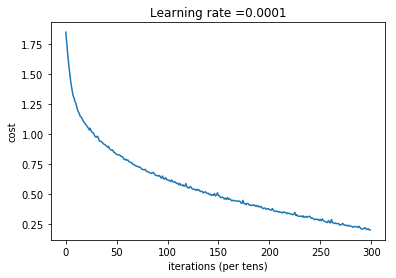

Parameters have been trained!
Train Accuracy: 0.9388889
Test Accuracy: 0.75


In [90]:
parameters = model(X_train, Y_train, X_test, Y_test)

**Résultat attendu**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        0.999074
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.716667
        </td>
    </tr>

</table>



